In [36]:
%matplotlib inline
import praw
import pandas as pd

In [4]:
## step 1 get reddit instance
user_name = 'xxx'
pw = 'xxx'
client_id = 'xxx'
client_secret = 'xxx'
user_agent = f'jupyter:jupyter_analysis:v0.0.1 (by /u/{user_name})'

In [5]:
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

In [6]:
print(reddit.read_only) 

True


In [7]:
subreddit = reddit.subreddit('newzealand')

print(subreddit.display_name)  # Output: redditdev
print(subreddit.title)         # Output: reddit Development
print(subreddit.description)  

newzealand
New Zealand: Tomorrow's Sideswipe, Today!
- **Citizen Science - Kererū count 2017!** 22 Sep - 1 Oct.  [Help count Kererū](https://redd.it/70plx3)

[/r/NewZealand Night Mode](http://nm.reddit.com/r/NewZealand)

[Travelling to New Zealand?](http://bit.ly/nztraveladvice)

#Events / meetups

* [/r/NewZealand Discord](https://discord.gg/6hdNNWp)

* [/r/newzealand IRC chat](https://kiwiirc.com/client/irc.snoonet.org/newzealand?nick=redditor)

*Please message the moderators if you would like to advertise a meetup or AMA*

#### Local subreddits
* [Auckland](/r/auckland "Auckland")
* [Christchurch](/r/chch "Christchurch")
* [Wellington](/r/wellington "Wellington")
* [The Tron](/r/thetron "The Tron")
* [Dunedin](/r/dunedin "Dunedin")
* [Hawkes Bay](/r/hawkesbay "Hawkes Bay")
* [Nelson](/r/nelsonnz "Nelson")
* [Taranaki](/r/taranaki "Taranaki")
* [Palmerston North](/r/palmy "Palmy")
* [Bay of Plenty](/r/bayofplenty "Bay of Plenty")
* [Blenheim](/r/blenheim "Blenheim")
* [West Coast](/r

In [14]:
for submission in subreddit.hot(limit=1):
    print(submission.title)  # Output: the submission's title
    print(submission.score)  # Output: the submission's score
    print(submission.id)     # Output: the submission's ID
    print(submission.url) 

Election Results 2: Electorate Boogaloo! - Election Results Live Thread
225
71wplz
https://www.reddit.com/live/zne2660dkv13/


In [31]:
submission_urls_nz = [submission.url for submission in subreddit.hot(limit=1000)]

In [32]:
submission_urls = pd.DataFrame({'url': submission_urls_nz})
submission_urls['root_url'] = submission_urls.url.apply(lambda x: x.split('//')[1].split('/')[0])

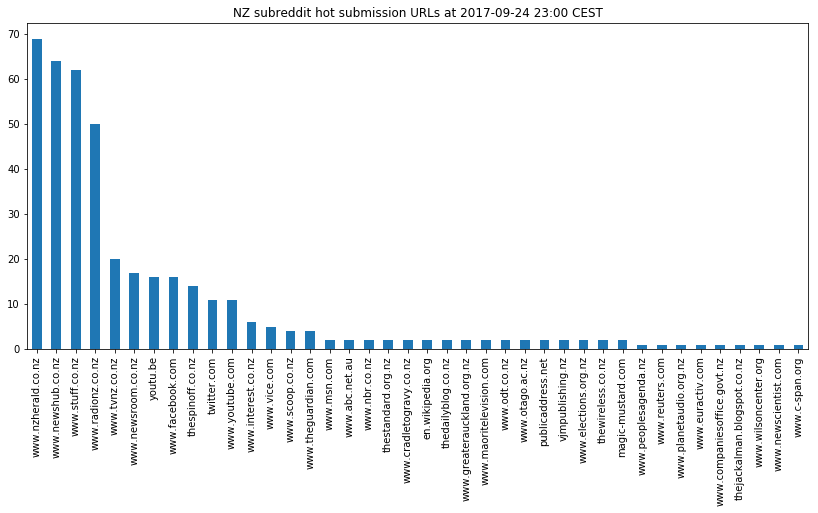

In [69]:
(submission_urls
 .loc[~submission_urls.root_url.str.contains('reddit|imgur|redd.it')]
 .root_url.value_counts().iloc[0:40]
 .plot.bar(figsize=(14, 6), 
           title='NZ subreddit hot submission URLs at 2017-09-24 23:00 CEST')
)

In [66]:
(submission_urls
 .loc[~submission_urls.root_url.str.contains('reddit|imgur|redd.it')]
 .root_url.value_counts().iloc[0:40]
)

www.nzherald.co.nz             69
www.newshub.co.nz              64
www.stuff.co.nz                62
www.radionz.co.nz              50
www.tvnz.co.nz                 20
www.newsroom.co.nz             17
youtu.be                       16
www.facebook.com               16
thespinoff.co.nz               14
twitter.com                    11
www.youtube.com                11
www.interest.co.nz              6
www.vice.com                    5
www.scoop.co.nz                 4
www.theguardian.com             4
www.msn.com                     2
www.abc.net.au                  2
www.nbr.co.nz                   2
thestandard.org.nz              2
www.cradletogravy.co.nz         2
en.wikipedia.org                2
thedailyblog.co.nz              2
www.greaterauckland.org.nz      2
www.maoritelevision.com         2
www.odt.co.nz                   2
www.otago.ac.nz                 2
publicaddress.net               2
vjmpublishing.nz                2
www.elections.org.nz            2
thewireless.co